# Data Preprocessing 

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.



- When creating a machine learning project, it is not always a case that we come across the clean and formatted data. 



- And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

# What is the need of Data Preprocessing?

o A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. 


o Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

#### It involves below steps:

    Getting the dataset
    Importing libraries
    Importing datasets
    Finding Missing Data
    Encoding Categorical Data
    Splitting dataset into training and test set
    Feature scaling


In [1]:
import numpy as np
import pandas as pd

In [2]:
#country , age and salary
data = [['India',38.0,68000.0],  
    ['France',43.0,45000.0],  
 ['Germany',30.0, 54000.0],  
 [np.nan ,np.nan, 65000.0], 
 ['Germany' ,40.0, np. nan],  
 ['India' ,35.0, 58000.0],  
 [np.nan, np.nan ,53000.0],  
 ['India' ,49.0, 79000.0],  
 ['India', 50.0 ,88000.0],  
 ['France' ,37.0, np.nan]]  
    

In [3]:
df = pd.DataFrame(data,columns=['country','value','share'])
df

,country,value,share
0,India,38.0,68000.0
1,France,43.0,45000.0
2,Germany,30.0,54000.0
3,NaN,NaN,65000.0
4,Germany,40.0,NaN
5,India,35.0,58000.0
6,NaN,NaN,53000.0
7,India,49.0,79000.0
8,India,50.0,88000.0
9,France,37.0,NaN


In [ ]:
#df.dropna()

In [5]:
#check null values
df.isna().sum()

country    0
value      2
share      2
dtype: int64

In [ ]:
#Assiggnment
# Plot the NaN present in your dataset

# Ways to handle missing data:

#### There are mainly two ways to handle missing data, which are:

- *By deleting the particular row:* The first way is used to commonly deal with null values. In this way, we just delete the specific row or column which consists of null values. But this way is not so efficient and removing data may lead to loss of information which will not give the accurate output.




- *By calculating the mean:* In this way, we will calculate the mean of that column or row which contains any missing value and will put it on the place of missing value. This strategy is useful for the features which have numeric data such as age, salary, year, etc. Here, we will use this approach. 

- By calculating mode(if you data is Categorical)

- if data is contineous the use mean
- if data is contineous/discrete + its sorted median
- if data is categorical then use mode

In [8]:
#handling missing data (Replacing missing data with the mean value)  
# SimpleImputer
from sklearn.impute import SimpleImputer

In [21]:
df

,country,value,share
0,India,38.0,68000.0
1,France,43.0,45000.0
2,Germany,30.0,54000.0
3,NaN,NaN,65000.0
4,Germany,40.0,NaN
5,India,35.0,58000.0
6,NaN,NaN,53000.0
7,India,49.0,79000.0
8,India,50.0,88000.0
9,France,37.0,NaN


In [10]:
si = SimpleImputer(strategy='most_frequent')

In [22]:
# now we want to transform/convert my county NaN by most_frequent items
    si.fit_transform(df[['country']])

array([['India'],
       ['France'],
       ['Germany'],
       ['India'],
       ['Germany'],
       ['India'],
       ['India'],
       ['India'],
       ['India'],
       ['France']], dtype=object)

In [27]:
#after fit u can check multiple things abt a column
si.missing_values

nan

In [28]:
si.n_features_in_

1

In [29]:
si.strategy

'most_frequent'

In [31]:
si.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'missing_values': nan,
 'strategy': 'most_frequent',
 'verbose': 0}

In [23]:
df.country.describe()

count         8
unique        3
top       India
freq          4
Name: country, dtype: object

In [24]:
df.country.value_counts()

India      4
France     2
Germany    2
Name: country, dtype: int64

In [25]:
df['new_country'] = si.fit_transform(df[['country']])

In [26]:
df

,country,value,share,new_country
0,India,38.0,68000.0,India
1,France,43.0,45000.0,France
2,Germany,30.0,54000.0,Germany
3,NaN,NaN,65000.0,India
4,Germany,40.0,NaN,Germany
5,India,35.0,58000.0,India
6,NaN,NaN,53000.0,India
7,India,49.0,79000.0,India
8,India,50.0,88000.0,India
9,France,37.0,NaN,France


In [34]:
dt = pd.DataFrame({'d1':[np.nan,'A','B'],'d2':['Cat1','Cat1',np.nan]})
dt

,d1,d2
0,NaN,Cat1
1,A,Cat1
2,B,NaN


In [35]:
si

SimpleImputer(strategy='most_frequent')

In [36]:
si.fit_transform(dt)

array([['A', 'Cat1'],
       ['A', 'Cat1'],
       ['B', 'Cat1']], dtype=object)

In [37]:
dt.d1.fillna(dt.d1.mode())

0    A
1    A
2    B
Name: d1, dtype: object

In [43]:
#Replacing missing data with the calculated mean value using transform
num = df[['value','share']]
si_n = SimpleImputer()

In [44]:
si_n.fit_transform(num)

array([[3.800e+01, 6.800e+04],
       [4.300e+01, 4.500e+04],
       [3.000e+01, 5.400e+04],
       [4.025e+01, 6.500e+04],
       [4.000e+01, 6.375e+04],
       [3.500e+01, 5.800e+04],
       [4.025e+01, 5.300e+04],
       [4.900e+01, 7.900e+04],
       [5.000e+01, 8.800e+04],
       [3.700e+01, 6.375e+04]])

In [48]:
num.share.mean()

63750.0

In [49]:
si_n.n_features_in_

2

In [50]:
si_n.missing_values

nan

In [51]:
si_n.strategy

'mean'

In [ ]:
# if we want to perform fit and transform together?


# Encoding Categorical data:

- Categorical data is data which has some categories such as,  Country


- Since machine learning model completely works on mathematics and numbers, but if our dataset would have a categorical variable, then it may create trouble while building the model. So it is necessary to encode these categorical variables into numbers. 

In [54]:
# using replacedf.
df.country.replace({'Germany':0,'India':1,'France':2})

0    1.0
1    2.0
2    0.0
3    NaN
4    0.0
5    1.0
6    NaN
7    1.0
8    1.0
9    2.0
Name: country, dtype: float64

In [57]:
df.new_country.map({'Germany':0,'India':1,'France':2})

0    1
1    2
2    0
3    1
4    0
5    1
6    1
7    1
8    1
9    2
Name: new_country, dtype: int64

# sklearn.preprocessing

## Label Encoder: Converts category to Numbers

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
lb = LabelEncoder()

In [64]:
# Use separate fit() and transform()
col =df.new_country
lb.fit(col)

LabelEncoder()

In [61]:
lb.classes_

array(['France', 'Germany', 'India'], dtype=object)

In [63]:
lb.get_params()

{}

In [65]:
lb.transform(col)

array([2, 0, 1, 2, 1, 2, 2, 2, 2, 0])

In [66]:
df.new_country

0      India
1     France
2    Germany
3      India
4    Germany
5      India
6      India
7      India
8      India
9     France
Name: new_country, dtype: object

In [67]:
conv = np.array([2, 0, 1, 2, 1, 2, 2, 2, 2, 0])
conv

array([2, 0, 1, 2, 1, 2, 2, 2, 2, 0])

In [68]:
#convert above numpy array to cateogory
lb.inverse_transform(conv)

array(['India', 'France', 'Germany', 'India', 'Germany', 'India', 'India',
       'India', 'India', 'France'], dtype=object)

In [69]:
lb.inverse_transform([0,0,1,2,0,1,1,2,2])

array(['France', 'France', 'Germany', 'India', 'France', 'Germany',
       'Germany', 'India', 'India'], dtype=object)

In [ ]:
#in above case labelencoder converted India as 2, France as 0 and germany as 1

In [71]:
#Apply fit() and transform() combinely
lb2 = LabelEncoder()
lb2.fit_transform(dt.d2)

array([0, 0, 1])

In [73]:
lb2.classes_

array(['Cat1', nan], dtype=object)

In [72]:
dt.d2

0    Cat1
1    Cat1
2     NaN
Name: d2, dtype: object

In [ ]:
# Interview question:
# What are different ways to deal with Categorical data?
# How to convert categorical data using pandas
# how to convert categorical data using sklearn.preprocessing

# Dummy Variables:

- Dummy variables are those variables which have values 0 or 1. 


- The 1 value gives the presence of that variable in a particular column, and rest variables become 0. 


- With dummy encoding, we will have a number of columns equal to the number of categories.


- In our dataset, we have 3 categories so it will produce three columns having 0 and 1 values.

In [ ]:
Example:
Gender    Male  Female
Male      1        0
Female    0        1
Female
Male

#### Wherever we have categorical data ina column, there u have to apply OneHotEncoder

In [ ]:
#Q:
- WHat is OneHotEncoding
- Explain encoding techinques in sklearn
- What is Dummy variable?

In [5]:
#Encoding for dummy variables using OneHotEncoder
d = pd.DataFrame({'place':['Katraj','Swargate','Camp','Katraj','Swargate','Camp','Katraj']})
d

,place
0,Katraj
1,Swargate
2,Camp
3,Katraj
4,Swargate
5,Camp
6,Katraj


In [7]:
d.place.unique()

array(['Katraj', 'Swargate', 'Camp'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
one = OneHotEncoder()

In [11]:
#fit and transform
one_d = one.fit_transform(d)
one_d

<7x3 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [22]:
# to see the conversion , use convert option of array
one_d.toarray().astype(int)

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [15]:
one.categories_

[array(['Camp', 'Katraj', 'Swargate'], dtype=object)]

In [16]:
d

,place
0,Katraj
1,Swargate
2,Camp
3,Katraj
4,Swargate
5,Camp
6,Katraj


In [23]:
pd.concat([d,pd.DataFrame(one_d.toarray().astype(int))],axis=1)

,place,0,1,2
0,Katraj,0,1,0
1,Swargate,0,0,1
2,Camp,1,0,0
3,Katraj,0,1,0
4,Swargate,0,0,1
5,Camp,1,0,0
6,Katraj,0,1,0


In [ ]:
0 1 = Katraj
1 0 = Camp
0 0 =Swargate

## Using pandas: get_dummies()

In [24]:
d

,place
0,Katraj
1,Swargate
2,Camp
3,Katraj
4,Swargate
5,Camp
6,Katraj


In [25]:
pd.get_dummies(d)

,place_Camp,place_Katraj,place_Swargate
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
5,1,0,0
6,0,1,0


In [28]:
pd.get_dummies(df.country)

,France,Germany,India
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,0
4,0,1,0
5,0,0,1
6,0,0,0
7,0,0,1
8,0,0,1
9,1,0,0


In [29]:
df.country

0      India
1     France
2    Germany
3        NaN
4    Germany
5      India
6        NaN
7      India
8      India
9     France
Name: country, dtype: object

In [ ]:
#How to deal with categorical data
# WHat are different encoding techniques?
# difference btween onehot and get_dummies,lablEncoder

# Feature Scaling

- Feature scaling is the final step of data preprocessing in machine learning. 


- It is a technique to standardize the independent variables of the dataset in a specific range. 


- In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable. 

#age = 30,40,50
#salary = 65000,56000,150000,240000

### StandardScaler: Standardization

In [ ]:
# StandardScaler   # x -mean(total_x)/std(total_x) -3  +3

In [46]:
val = pd.DataFrame([3400,3700,4200,5600,4100])
val

,0
0,3400
1,3700
2,4200
3,5600
4,4100


In [33]:
# mean 
m = val[0].mean()
m

42.0

In [35]:
std = val[0].std()
std

8.455767262643882

In [38]:
val  # -3 to +3
(134 - m)/std

10.88014808619912

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [48]:
val[:3]

,0
0,3400
1,3700
2,4200


In [47]:
sc.fit_transform(val)

array([[-1.05777177],
       [-0.66110736],
       [ 0.        ],
       [ 1.8511006 ],
       [-0.13222147]])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

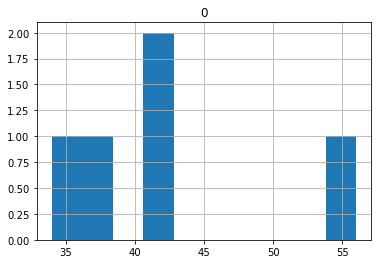

In [43]:
val.hist()

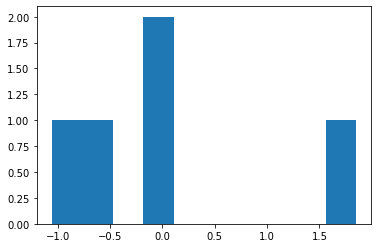

In [45]:
import matplotlib.pyplot as plt
plt.hist(sc.fit_transform(val))
plt.show()

### MinMaxScaler: Normalization

In [ ]:
# MinMaxScaler  # x- min()/(max()-min())
#range of minMax scalar is 0 to 1

In [49]:
from sklearn.preprocessing import Normalizer

In [50]:
n = Normalizer()

In [52]:
n.fit_transform(val)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [58]:
numeric = df.drop(columns=['country'])
numeric[:2]

,value,share
0,38.0,68000.0
1,43.0,45000.0


In [59]:
n.fit_transform(numeric) #here it wont work becaues we have NaN values

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
n.fit_transform([[12,23,22,25,18,20]]) # 0 to 1

array([[0.23971252, 0.45944899, 0.43947295, 0.49940108, 0.35956878,
        0.39952086]])

In [ ]:
#When to Use Standardization and normalization?

### Binarizer

In [1]:
# Binarizer:is threshold based
"""
Binarize data (set feature values to 0 or 1) according to a threshold.

Values greater than the threshold map to 1, while values less than
or equal to the threshold map to 0. With the default threshold of 0,
only positive values map to 1.
"""
from sklearn.preprocessing import Binarizer

In [5]:
data = [[-1,-2,-3,1,2,3,5,6,7]]

In [6]:
b = Binarizer()

In [7]:
b.fit_transform(data)

array([[0, 0, 0, 1, 1, 1, 1, 1, 1]])

In [8]:
# lets change threshold
data_2 = [[12,32,45,17,20,34,45,17,19,20]]

In [15]:

.b2 = Binarizer(threshold=20)

In [16]:
b2.fit_transform(data_2)

array([[0, 1, 1, 0, 0, 1, 1, 0, 0, 0]])